In [1]:
# Import the Features and Targets
import pandas as pd
import numpy as np
import seaborn as sns

X_train = pd.read_csv("dataset/preprocessed/Features_Training_Set.csv", index_col=0).to_numpy()
X_test = pd.read_csv("dataset/preprocessed/Features_Testing_Set.csv", index_col=0).to_numpy()
y_train = pd.read_csv("dataset/preprocessed/Target_Training_Set.csv", index_col=0).to_numpy().ravel()
y_test = pd.read_csv("dataset/preprocessed/Target_Testing_Set.csv", index_col=0).to_numpy().ravel()

In [2]:
# Train the support vector classifier
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [3]:
# Show the metrics of the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

RESULTS_BASELINE = pd.DataFrame({
  "Metric": ["Accuracy", "Precision", "Recall", "F1"],
  "Value": [metric(y_true=y_test, y_pred=y_pred) for metric in [accuracy_score, precision_score, recall_score, f1_score]]
})

RESULTS_BASELINE

,Metric,Value
0,Accuracy,0.931174
1,Precision,0.969298
2,Recall,0.891129
3,F1,0.928571


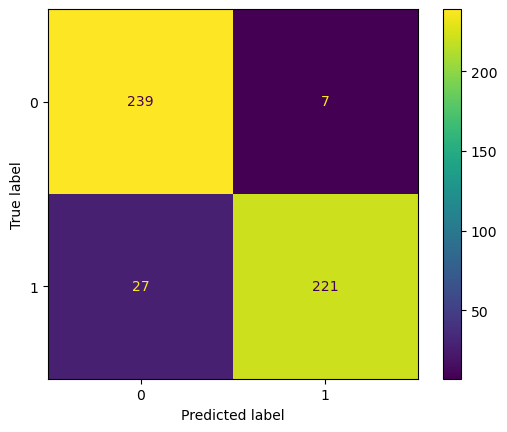

In [4]:
# Plot the confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
heatmap = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
heatmap.plot();

In [5]:
# Show the classification report
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       246
           1       0.97      0.89      0.93       248

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494

